In [ ]:
!pip install pycaret --user

In [ ]:
!pip install markupsafe==2.0.1

In [ ]:
import pandas as pd

df = pd.read_csv('/content/hr_employee_churn_data.csv')
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [ ]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
df.nunique()

empid                    14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
promotion_last_5years        2
salary                       3
left                         2
dtype: int64

In [ ]:
df.promotion_last_5years.unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

# Prepare the data

In [ ]:
import jinja2
from pycaret.classification import *
setup = setup(data=df, target='left', numeric_imputation='median', session_id=123)

,Description,Value
0,session_id,123
1,Target,left
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14999, 10)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# Compare the model

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9887,0.9922,0.9620,0.9902,0.9758,0.9684,0.9686,1.329
et,Extra Trees Classifier,0.9853,0.9909,0.9596,0.9785,0.9689,0.9593,0.9594,0.766
lightgbm,Light Gradient Boosting Machine,0.9850,0.9934,0.9520,0.9844,0.9678,0.9580,0.9583,0.176
gbc,Gradient Boosting Classifier,0.9764,0.9878,0.9276,0.9720,0.9492,0.9338,0.9343,0.776
dt,Decision Tree Classifier,0.9759,0.9708,0.9612,0.9393,0.9500,0.9341,0.9343,0.086
ada,Ada Boost Classifier,0.9607,0.9820,0.9092,0.9245,0.9166,0.8909,0.8911,0.347
knn,K Neighbors Classifier,0.9449,0.9714,0.9116,0.8649,0.8875,0.8511,0.8517,0.219
lr,Logistic Regression,0.9012,0.9383,0.8092,0.7837,0.7960,0.7309,0.7312,0.946
ridge,Ridge Classifier,0.8847,0.0000,0.8116,0.7334,0.7702,0.6935,0.6953,0.027
lda,Linear Discriminant Analysis,0.8839,0.9300,0.8412,0.7195,0.7754,0.6978,0.7018,0.048


# Reproduce the best model

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9905,0.9926,0.9800,0.9800,0.9800,0.9738,0.9738
1,0.9886,0.9915,0.9600,0.9917,0.9756,0.9681,0.9684
2,0.9914,0.9978,0.9760,0.9879,0.9819,0.9763,0.9763
3,0.9848,0.9923,0.9520,0.9835,0.9675,0.9575,0.9577
4,0.9905,0.9933,0.9720,0.9878,0.9798,0.9736,0.9737
5,0.9876,0.9951,0.9480,1.0000,0.9733,0.9653,0.9658
6,0.9933,0.9963,0.9800,0.9919,0.9859,0.9815,0.9816
7,0.9838,0.9847,0.9400,0.9916,0.9651,0.9546,0.9551
8,0.9905,0.9917,0.9640,0.9959,0.9797,0.9735,0.9737


# Hyperparameter Tuning
Although the model has got the best result, we can improve it by doing hyperparameter tuning. Hyperparameter tuning is a process where we pick the best hyperparameter from all hyperparameter combinations. In simple terms, a hyperparameter is a parameter that we can set on a model before we can train it on the dataset.

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9762,0.9774,0.9240,0.9747,0.9487,0.9332,0.9337
1,0.9762,0.9746,0.9200,0.9787,0.9485,0.9330,0.9337
2,0.9857,0.9859,0.9600,0.9796,0.9697,0.9604,0.9604
3,0.9695,0.9741,0.9120,0.9580,0.9344,0.9146,0.9151
4,0.9819,0.9873,0.9560,0.9676,0.9618,0.9499,0.9499
5,0.9705,0.9742,0.9040,0.9700,0.9358,0.9167,0.9176
6,0.9695,0.9760,0.9120,0.9580,0.9344,0.9146,0.9151
7,0.9705,0.9668,0.9040,0.9700,0.9358,0.9167,0.9176
8,0.9810,0.9830,0.9280,0.9915,0.9587,0.9463,0.9472


# Model evaluation

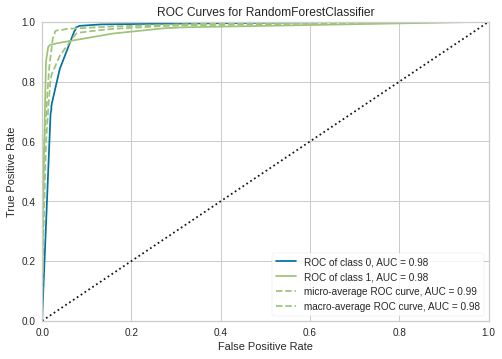

In [ ]:
# plot roc curve 
plot_model(tuned_rf, plot='auc')

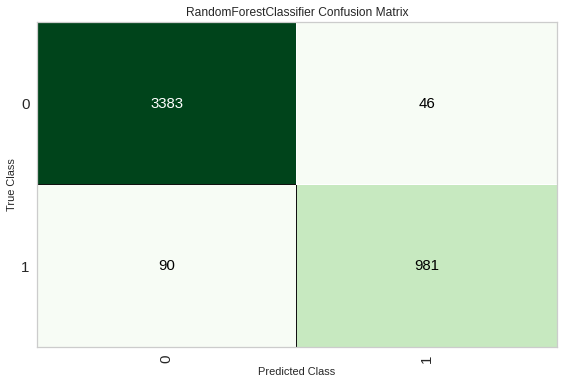

In [ ]:
plot_model(tuned_rf, plot='confusion_matrix')

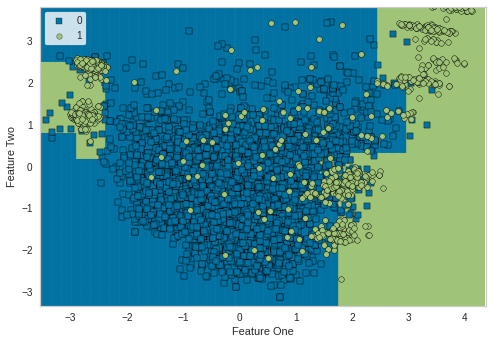

In [ ]:
# visualise decision boundary
plot_model(tuned_rf, plot='boundary')

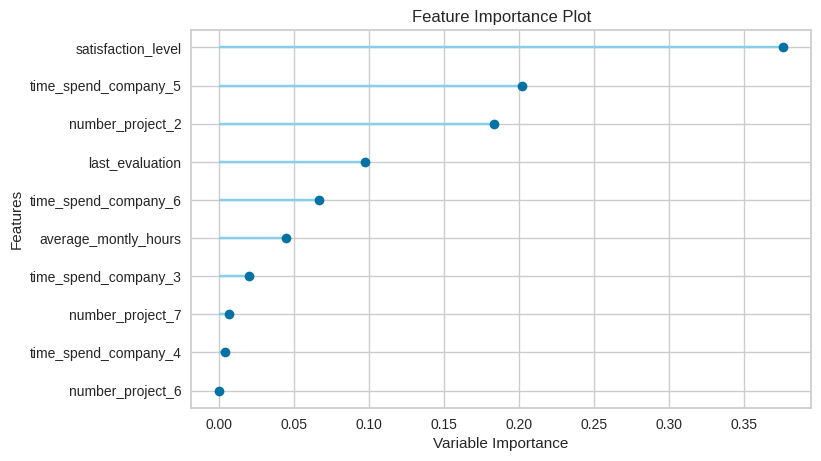

In [ ]:
# Feature importance
plot_model(tuned_rf, plot='feature')

# Model testing

In [ ]:
# Test the model on the unseen data.
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9698,0.9768,0.916,0.9552,0.9352,0.9155,0.9158


,satisfaction_level,last_evaluation,average_montly_hours,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_10,...,time_spend_company_7,time_spend_company_8,Work_accident_1,promotion_last_5years_1,salary_high,salary_low,salary_medium,left,Label,Score
0,0.54,0.67,154.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9914
1,0.72,0.52,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.9648
2,0.95,0.61,267.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9914
3,0.78,0.79,203.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9914
4,0.60,0.40,146.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.84,0.66,204.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9914
4496,0.68,0.67,162.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9914
4497,0.57,0.69,154.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9914
4498,0.64,0.85,179.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9914


# Save the model

Before we can save the model, we need to retrain the model. In PyCaret, we can use the finalize_model function for doing that. The training process will take the complete set of the data, including the test data. Therefore, we can use the model on the actual test data later. Here is the code for doing that:

In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
save_model(final_rf, 'Final Model RF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['empid'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_